# import libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re

# Import and load dataset

In [ ]:
drink_menu = pd.read_csv("drinkMenu.csv")

showing first 4 rows in dataset

In [ ]:
drink_menu.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


showing all dataset

In [ ]:
drink_menu

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


# getting some info about dataset

In [ ]:
drink_menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

# checking duplicated row in dataset

In [ ]:
drink_menu.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
237    False
238    False
239    False
240    False
241    False
Length: 242, dtype: bool

In [ ]:
drink_menu.duplicated().sum()

0

I found no duplicated row in data.

# checking null values in  dataset

In [ ]:
drink_menu.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [ ]:
drink_menu['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'Varies', '50', '70', '120',
       '55', '80', '110', 'varies', '165', '235', '90', nan, '125', '170',
       '15', '130', '140', '100', '145', '65', '105'], dtype=object)

I found missing spelling in some value in Caffeine (mg) column ('Varies','varies') so replace Varies with varies

In [ ]:
drink_menu['Caffeine (mg)'].replace('Varies','varies', inplace=True)

# checking unique value in Caffeine (mg) column

In [ ]:
drink_menu['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'varies', '50', '70', '120',
       '55', '80', '110', '165', '235', '90', nan, '125', '170', '15',
       '130', '140', '100', '145', '65', '105'], dtype=object)

I found one vlaue with null so the data is very clear. I fill null value with mode methode because Caffeine (mg) column is type of objet and I can not rplace varies with any value because it is not specific vlue so if replace varies with any value may affect on phase of machine learning  

In [ ]:
drink_menu['Caffeine (mg)'].fillna((drink_menu['Caffeine (mg)'].mode()[0]), inplace=True)

# check unique value in Caffeine (mg) column after replacing null value

In [ ]:
drink_menu['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'varies', '50', '70', '120',
       '55', '80', '110', '165', '235', '90', '125', '170', '15', '130',
       '140', '100', '145', '65', '105'], dtype=object)

# checking duplicated row in dataset  after replacing null values

In [ ]:
drink_menu.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
237    False
238    False
239    False
240    False
241    False
Length: 242, dtype: bool

In [ ]:
drink_menu.duplicated().sum()

0

# Dropping unnecessary Columns

# firstly, checking all columns which have one value

In [ ]:
drink_menu.columns[drink_menu.nunique()==1].tolist()

[]

After checking I found no coulmn has one value so all column is important but I try another another strategy to make sure some column is important or not.

# secondly, checking some columns which have huge difference between  count values

In [ ]:
drink_menu[' Dietary Fibre (g)'].value_counts()

0    141
1     60
2     25
7      5
3      4
4      3
6      3
8      1
Name:  Dietary Fibre (g), dtype: int64

In [ ]:
drink_menu[' Total Fat (g)'].value_counts()

0.1    34
0      21
1.5    16
5      15
3      15
4      14
0.2    14
1      13
2.5    13
6      13
3.5    12
7      10
2      10
4.5     9
0.3     6
8       6
9       6
0.5     4
11      3
10      3
0.4     2
15      1
13      1
3 2     1
Name:  Total Fat (g), dtype: int64

In [ ]:
drink_menu['Trans Fat (g) '].value_counts()

0.1    36
0.0    33
0.2    22
1.0    21
2.0    20
0.5    20
1.5    16
0.4    12
3.5    11
2.5    10
3.0    10
0.3    10
4.5     6
6.0     5
5.0     4
4.0     3
7.0     2
9.0     1
Name: Trans Fat (g) , dtype: int64

In [ ]:
drink_menu['Saturated Fat (g)'].value_counts()

0.0    180
0.1     37
0.2     21
0.3      4
Name: Saturated Fat (g), dtype: int64

In [ ]:
drink_menu['Vitamin A (% DV) '].value_counts()

10%    43
6%     37
4%     37
15%    36
0%     27
8%     23
20%    18
25%    11
2%      5
50%     3
30%     2
Name: Vitamin A (% DV) , dtype: int64

In [ ]:
drink_menu['Beverage_prep'].value_counts()

Soymilk               66
2% Milk               50
Grande Nonfat Milk    26
Tall Nonfat Milk      23
Venti Nonfat Milk     22
Whole Milk            16
Short Nonfat Milk     12
Tall                   7
Grande                 7
Venti                  7
Short                  4
Solo                   1
Doppio                 1
Name: Beverage_prep, dtype: int64

After Applying value_counts on some column , I found not difference in value_counts for some column so all column is important but I try another strategy to make sure some column is important or not.

# Third, cheking some columns with label column

Assuming this dataset is used to classify Beverage_category so Beverage_category is label column. I prepare dataset to check correlation between columns with label column.	

In [ ]:
drink_menu[' Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

After checking unique value of Total Fat (g) column, I found replace '3 2' with '32'

In [ ]:
drink_menu[' Total Fat (g)'].replace('3 2','32', inplace=True)

convert Total Fat (g) coulmn from object type to float type

In [ ]:
drink_menu[' Total Fat (g)']=drink_menu[' Total Fat (g)'].astype(float)

removing % in four columns which are Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV) and Iron (% DV)

In [ ]:
def get_Percentage(x): 
    match=re.findall(r'\d+%', str(x))
    if match is None:
        return None
    else:
        for i in range(0,len(match)):
            return float(str(match[i]).rstrip("%"))

In [ ]:
drink_menu['Vitamin A (% DV) '] = drink_menu['Vitamin A (% DV) '].apply(get_Percentage)
drink_menu['Vitamin C (% DV)'] = drink_menu['Vitamin C (% DV)'].apply(get_Percentage)
drink_menu[' Calcium (% DV) '] = drink_menu[' Calcium (% DV) '].apply(get_Percentage) 
drink_menu['Iron (% DV) '] = drink_menu['Iron (% DV) '].apply(get_Percentage)

# checking dataset after removing %

In [ ]:
drink_menu

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.0,0.0,0.0,0.0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.0,0.0,0.0,0.0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,0.0,0.0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,2.0,0.0,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10.0,0.0,20.0,0.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,32.0,0.4,0.0,0,250,67,1,64,5.0,6.0,8.0,20.0,10.0,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6.0,0.0,10.0,0.0,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6.0,0.0,10.0,0.0,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4.0,0.0,10.0,6.0,0


In [ ]:
drink_menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    float64
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    float64

label encoding for label column 

In [ ]:
le = LabelEncoder()
drink_menu['Beverage_category']=le.fit_transform(drink_menu['Beverage_category'])

correlation between columns with label column

In [ ]:
drink_menu.corr().loc['Beverage_category']

Beverage_category            1.000000
Calories                     0.136394
 Total Fat (g)               0.004949
Trans Fat (g)                0.004235
Saturated Fat (g)           -0.012481
 Sodium (mg)                 0.027701
 Total Carbohydrates (g)    -0.170832
Cholesterol (mg)             0.141937
 Dietary Fibre (g)           0.138084
 Sugars (g)                  0.141971
 Protein (g)                 0.080038
Vitamin A (% DV)             0.061679
Vitamin C (% DV)             0.222363
 Calcium (% DV)              0.034374
Iron (% DV)                 -0.097831
Name: Beverage_category, dtype: float64

correlation is very close between columns and target column

# using barplot to display relationship between a numeric and a categorical variable

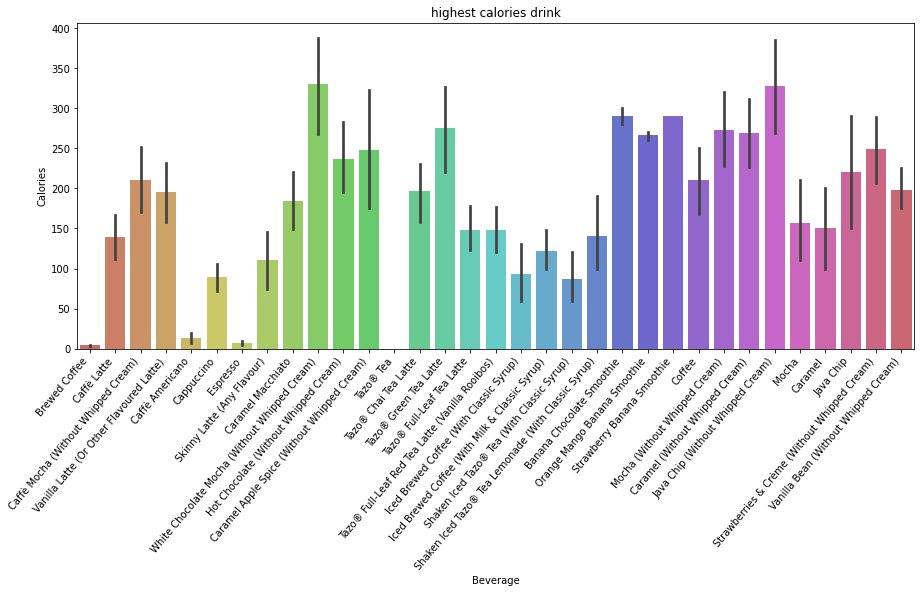

In [ ]:
# barplot for knowing drink which has highest Calories 
plt.figure(figsize=(15,6))
sns.barplot(x="Beverage",y="Calories",data=drink_menu,palette ='hls')
plt.xticks(rotation=50,ha='right')
plt.title("highest calories drink")
plt.show()

After plotting bar plot, I found White chocolate mocha (without whipped cream) to have highest Calories then Java Chip (Without Whipped Cream) having the second highest Calories

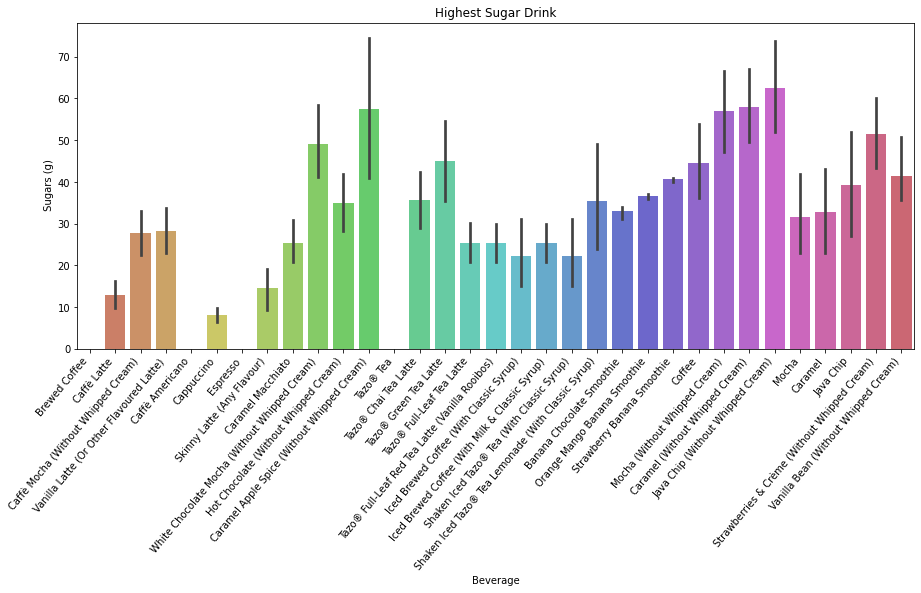

In [ ]:
# barplot for knowing drink which has highest Sugars 
plt.figure(figsize=(15,6))
sns.barplot(x="Beverage",y=" Sugars (g)",data=drink_menu,palette ='hls')
plt.xticks(rotation=50,ha='right')
plt.title("Highest Sugar Drink")
plt.show()

After plotting bar plot, I found Java Chip (Without Whipped Cream) to have highest Sugars then Caramel Apple Spice (Without Whipped Cream) the second highest Sugars

# Note

In Visualisations, using Beverage column  drink not Beverage_category to know drink which have highest calories and Sugars but if you want to know category, you should use Beverage_category column.

# **Reference**

https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/

https://seaborn.pydata.org/generated/seaborn.barplot.html

https://www.delftstack.com/howto/seaborn/rotate-tick-labels-seaborn/

https://pythonguides.com/matplotlib-rotate-tick-labels/
